In [1]:
import pandas as pd
dataset=pd.read_csv("Pre_processed_Placement.csv")

In [2]:
dataset["ssc_p"].cov(dataset["hsc_p"])

58.85325297544013

In [3]:
dataset.cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,1.138318e+04
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,11383.177570,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [4]:
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [5]:
dataset.corrwith(dataset["ssc_p"])

sl_no      -0.078155
ssc_p       1.000000
hsc_p       0.513478
degree_p    0.538686
etest_p     0.261993
mba_p       0.388478
salary      0.558475
dtype: float64

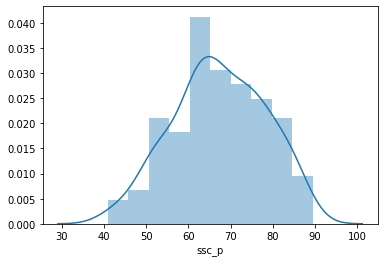

In [8]:
import seaborn as sns

sns.distplot(dataset["ssc_p"])

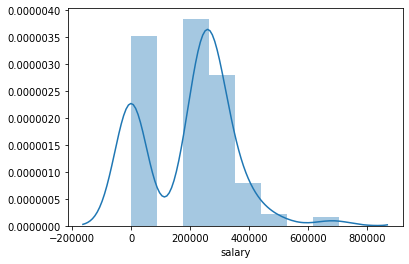

In [7]:
sns.distplot(dataset["salary"])

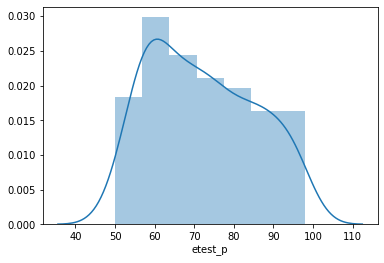

In [9]:
sns.distplot(dataset["etest_p"])

# Independent Sample
Diferrent Group(Male, Female) but same condition(salary)

Question: is significantly same the salary of male and female candidate?

In [11]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['salary']
female = dataset[dataset['gender']=='F']['salary']
tAns=ttest_ind(male, female)

In [12]:
tAns

Ttest_indResult(statistic=2.0937842507001165, pvalue=0.03746230397067219)

In [17]:
print("Null Hypothesis: There is no significantly same the salary of male and female candiate")
print("Alternate Hypothesis: There is significantly same the salary of male and female candiate ")
print("******")
if(tAns.pvalue<0.05):
    print("Reject Null Hypothesis")
    print("Accept Alternate hypothesis")
    message="There is significantly same the salary of male and female candiate"
else:
    print("Reject Alternate Hypothesis")
    print("Accept Null hypothesis")
    message="There is no significantly same the salary of male and female candiate"
print(message)    

Null Hypothesis: There is no significantly same the salary of male and female candiate
Alternate Hypothesis: There is significantly same the salary of male and female candiate 
******
Reject Null Hypothesis
Accept Alternate hypothesis
There is significantly same the salary of male and female candiate


# Dependent Sample
Same Group(Male) but Different Condition(ssc_p, hsc_p)

In [20]:
from scipy.stats import ttest_rel
male_ssc_p = dataset[dataset['gender']=='M']['ssc_p']
male_hsc_p = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male_ssc_p, male_hsc_p)

Ttest_relResult(statistic=0.6842940392688153, pvalue=0.4949370716000775)

In [22]:
print("Null Hypothesis: There is no significantly same the ssc_p and hsc_p marks of male candidate")
print("Alternate Hypothesis: There is significantly same the ssc_p and hsc_p marks of male candidate")
print("******")
if(tAns.pvalue<0.05):
    print("Reject Null Hypothesis")
    print("Accept Alternate hypothesis")
    message="There is significantly same the ssc_p and hsc_p marks of male candidate"
else:
    print("Reject Alternate Hypothesis")
    print("Accept Null hypothesis")
    message="There is no significantly same the ssc_p and hsc_p marks of male candidate"
print(message) 

Null Hypothesis: There is no significantly same the ssc_p and hsc_p marks of male candidate
Alternate Hypothesis: There is significantly same the ssc_p and hsc_p marks of male candidate
******
Reject Null Hypothesis
Accept Alternate hypothesis
There is significantly same the ssc_p and hsc_p marks of male candidate
